In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re


In [14]:
colors= {
    "ENTP": "blue",
    "INTP": "black",
    "INTJ": "green",
    "ENTJ": "cyan",
    "INFJ": "white",
    "ENFJ": "yellow",
    "INFP": "red",
    "ENFP": "magenta",
    "ISFJ": "orange",
    "ISTJ": "blue",
    "ESTJ": "black",
    "ESFJ": "green",
    "ISFP": "cyan",
    "ISTP": "yellow",
    "ESTP": "red",
    "ESFP": "magenta",
}

In [2]:
personality=pd.read_csv("cleaned_data_new.csv")

In [3]:
personality.head()

,Unnamed: 0,type,Extrovert,Sensing,Thinking,Judging,posts,cleaned_posts,compound--sentiment,positive--sentiment,negative--sentiment,neutral--sentiment,question_mark,exclamation_marks,colon,emoji,word,unique_word,links,images_count
0,0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.999800,0.416667,0.133020,0.638860,0.08,0.22,0.32,0.08,30.98,14.92,0.04,0.00
1,1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.999950,0.588710,0.131455,0.505808,0.12,0.36,0.14,0.00,28.58,12.72,0.02,0.00
2,2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.995499,0.353495,0.294210,0.579725,0.32,0.10,0.50,0.20,22.28,11.76,0.06,0.04
3,3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.999700,0.431452,0.256651,0.543823,0.04,0.00,0.00,0.00,34.36,15.38,0.02,0.00
4,4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.999700,0.426075,0.172144,0.605069,0.64,0.48,0.14,0.00,23.90,12.66,0.50,0.04


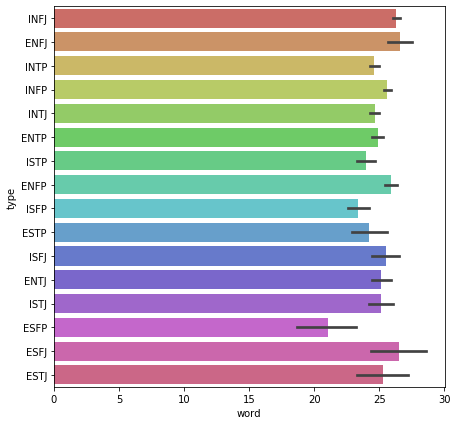

In [4]:
plt.figure(figsize=(7, 7))
sns.barplot(x='word',y='type',data=personality,palette='hls')

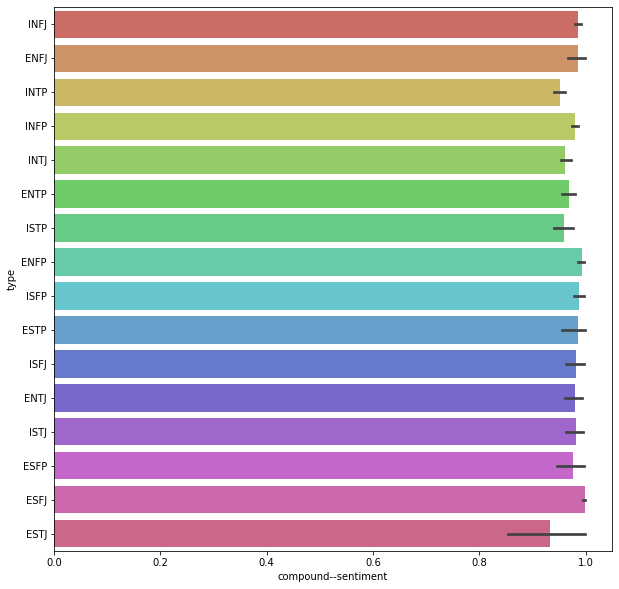

In [5]:
plt.figure(figsize=(10, 10))
sns.barplot(y="type", x="compound--sentiment", data=personality, palette='hls')

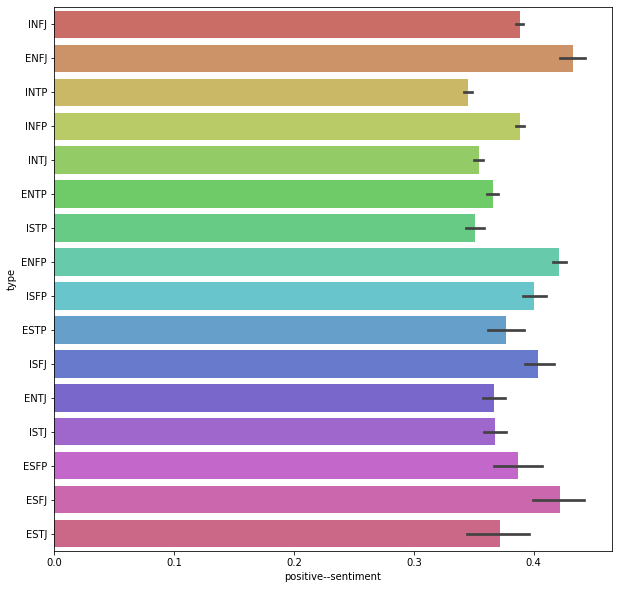

In [6]:
plt.figure(figsize=(10, 10))
sns.barplot(y="type", x="positive--sentiment", data=personality, palette='hls')

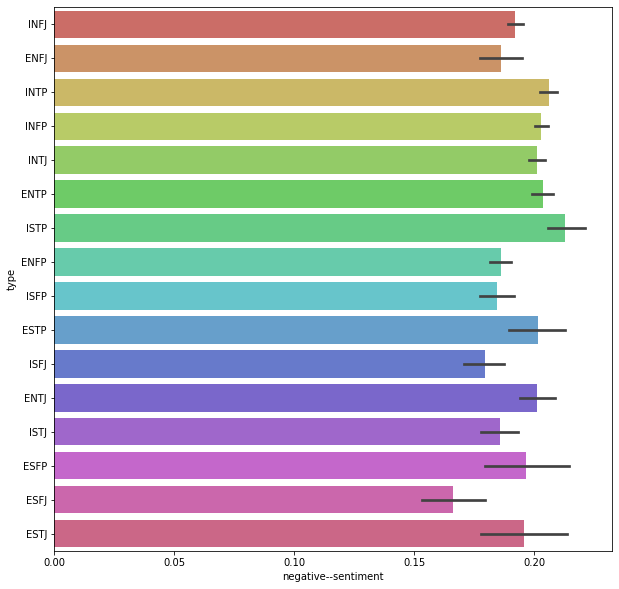

In [7]:
plt.figure(figsize=(10, 10))
sns.barplot(y="type", x="negative--sentiment", data=personality, palette='hls')

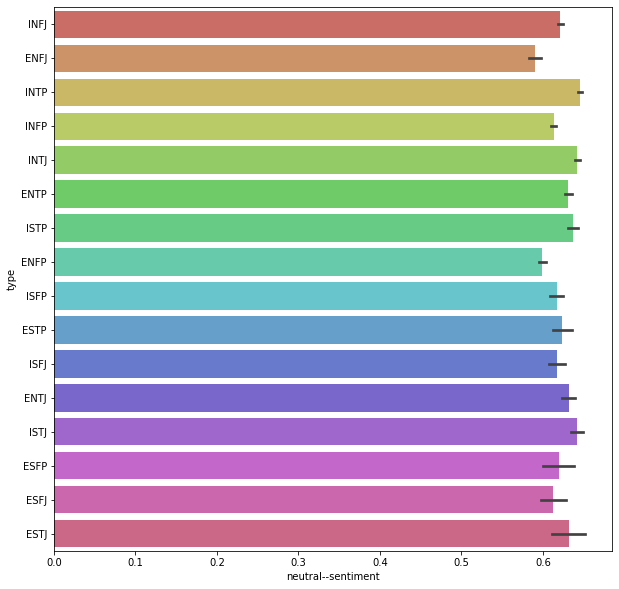

In [8]:
plt.figure(figsize=(10, 10))
sns.barplot(y="type", x="neutral--sentiment", data=personality, palette='hls')

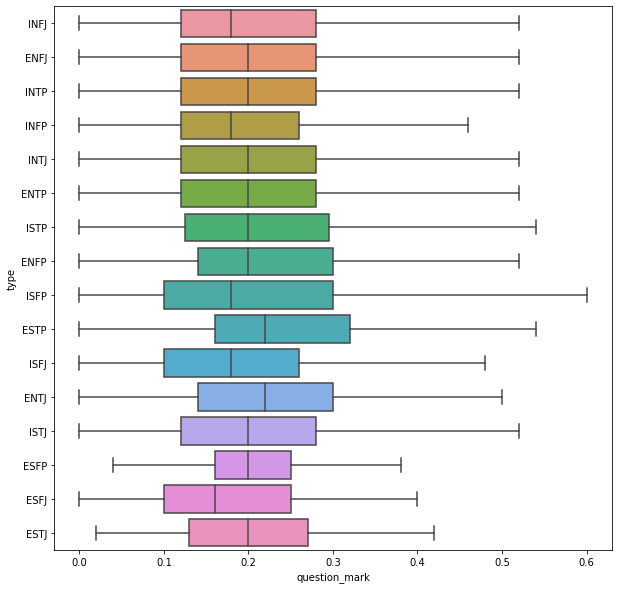

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot(y="type", x="question_mark", data=personality, showfliers=False)

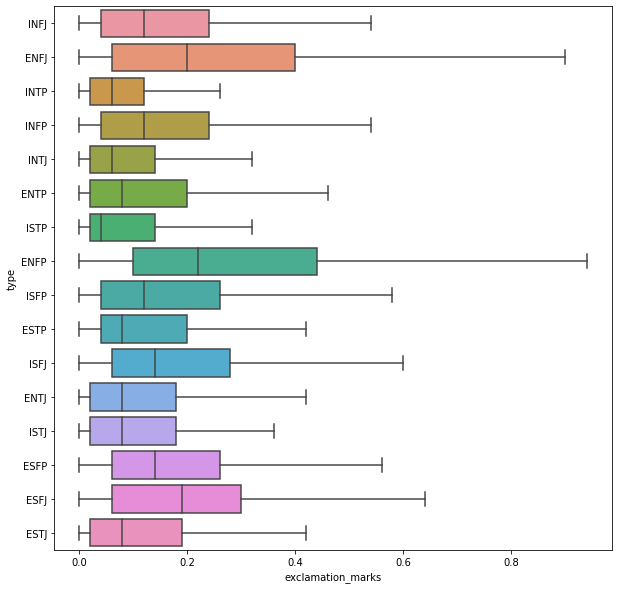

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(y="type", x="exclamation_marks", data=personality, showfliers=False)

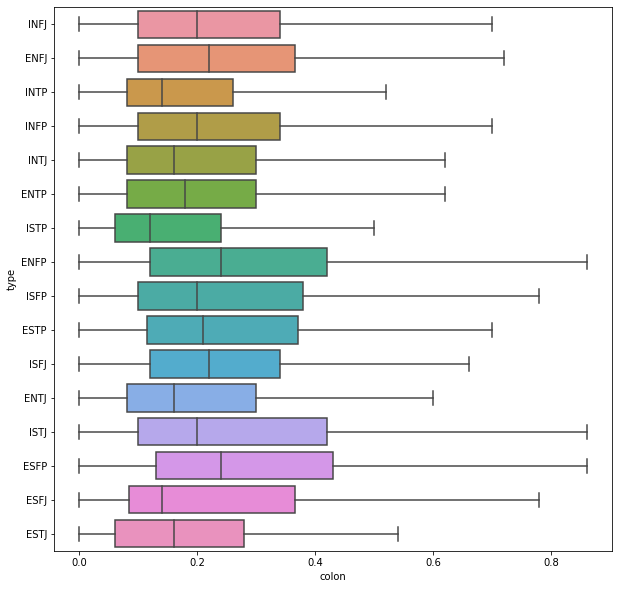

In [11]:
plt.figure(figsize=(10, 10))
sns.boxplot(y="type", x="colon", data=personality, showfliers=False)

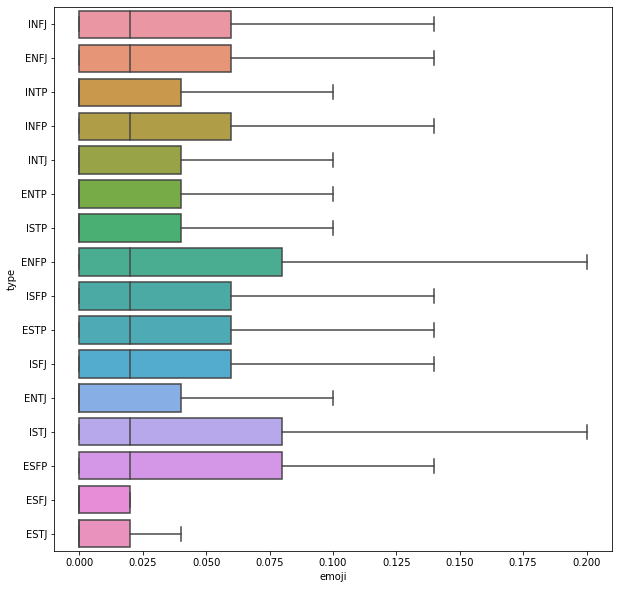

In [12]:
plt.figure(figsize=(10, 10))
sns.boxplot(y="type", x="emoji", data=personality, showfliers=False)

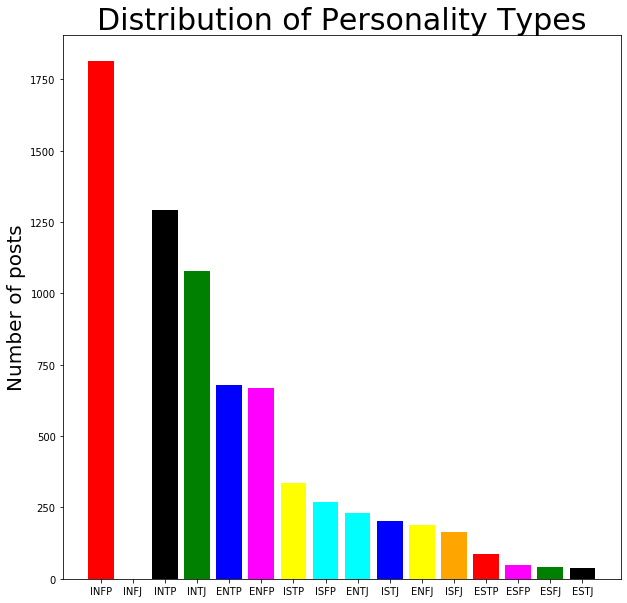

In [16]:
dis = (
    personality.groupby("type")
    .agg({"type": "count"})
    .rename(columns={"type": "count"})
    .sort_values("count", ascending=False)
)
colors = {x: colors[x] for x in dis.index.tolist()}
plt.figure(figsize=(10, 10))
plt.title("Distribution of Personality Types", fontsize=30)
plt.ylabel("Number of posts", fontsize=20)
plt.bar(dis.index, dis["count"], color=list(colors.values()))
plt.show()